## LA water quality in the year 2017

1. Imported the packages
2. Downloaded the shape file
3. Loaded the data
4. Extraction of Latitude and Longitude from a object column
5. Creating a geodataframe
6. An interactive plot showing the water contaminant count
7. A plot on LA map showing the water quality in different neighborhood.


Data citation:

https://geohub.lacity.org/datasets/7835077624374b9fa65676443ba7a578_19/about

Los Angeles water contaminant data from calenviroscreen.

Drinking Water Contaminants: An index measuring the average annual concentration of 13 common water contaminants in water systems, using data from 2005 to 2013

The drinking water contaminant index is calculated based on the concentration of 13 different types of contaminants commonly found in drinking water. Each census tract is given a percentile score for each type of water contaminant, ranking it compared to other census tracts. A census tract's percentile scores for each contaminant are then added together to give a total drinking water contaminant index for each census tract. Areas that score higher on the index have a higher percentile ranking and therefore have less drinking water contamination.
https://www.kaggle.com/datasets/peternooteboom/los-angeles-water-quality?select=Water_Quality__LA_.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
import matplotlib.cm as cm
import branca as bc
import folium

In [4]:
map = gpd.read_file('../data/water_quality/City_boundaries/City_boundaries.shp')

In [5]:
df = pd.read_csv('../data/water_quality/Water_Quality_LA.csv')

In [6]:
print(map.crs)

EPSG:4326


In [7]:
df.Location.str.strip('\(|\)').str.split(',',expand = True)

,0,1
0,34.137367,-118.352786
1,33.925708,-118.162308
2,33.343563,-118.3300478
3,33.388813499999998,-118.423552636715
4,34.69674,-118.227897
...,...,...
2351,34.2727625,-118.2952615
2352,33.93683848,-118.4083005
2353,33.9090245,-118.412818
2354,33.73751,-118.2614255


In [8]:
df[['Latitude','Longitude']] = df.Location.str.strip('\(|\)').str.split(',',expand = True)

In [9]:
geometry = [Point(xy) for xy in zip(df.Longitude,df.Latitude)]

In [10]:
crs = {'init':'epsg:4326'}

In [11]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry= geometry)

C:\Users\Radhai\anaconda3\envs\EDA\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
df.head()

,Policy Area,Dataset,Variable,Year,Count,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date,Latitude,Longitude,geometry
0,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 3200, Los Angeles County, California",320000,Universal City,1400000US06037320000,"(34.137367, -118.352786)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,34.137367,-118.352786,POINT (-118.35279 34.13737)
1,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 5516, Los Angeles County, California",551600,Downey,1400000US06037551600,"(33.925708, -118.162308)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,33.925708,-118.162308,POINT (-118.16231 33.92571)
2,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 5990, Los Angeles County, California",599000,Avalon,1400000US06037599000,"(33.343563, -118.3300478)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,33.343563,-118.3300478,POINT (-118.33005 33.34356)
3,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 5991, Los Angeles County, California",599100,Unincorporated Catalina Island,1400000US06037599100,"(33.388813499999998, -118.423552636715)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,33.388813499999998,-118.423552636715,POINT (-118.42355 33.38881)
4,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 9010.03, Los Angeles County, Cali...",901003,Lancaster,1400000US06037901003,"(34.69674, -118.227897)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,34.69674,-118.227897,POINT (-118.22790 34.69674)


In [13]:
geo_df.head()

,Policy Area,Dataset,Variable,Year,Count,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date,Latitude,Longitude,geometry
0,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 3200, Los Angeles County, California",320000,Universal City,1400000US06037320000,"(34.137367, -118.352786)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,34.137367,-118.352786,POINT (-118.35279 34.13737)
1,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 5516, Los Angeles County, California",551600,Downey,1400000US06037551600,"(33.925708, -118.162308)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,33.925708,-118.162308,POINT (-118.16231 33.92571)
2,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 5990, Los Angeles County, California",599000,Avalon,1400000US06037599000,"(33.343563, -118.3300478)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,33.343563,-118.3300478,POINT (-118.33005 33.34356)
3,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 5991, Los Angeles County, California",599100,Unincorporated Catalina Island,1400000US06037599100,"(33.388813499999998, -118.423552636715)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,33.388813499999998,-118.423552636715,POINT (-118.42355 33.38881)
4,Environment,Water Quality,Drinking Water Contaminants,2014,NaN,"Census Tract 9010.03, Los Angeles County, Cali...",901003,Lancaster,1400000US06037901003,"(34.69674, -118.227897)",Drinking_Water_Contaminants_2014_1400000US0603...,1/1/14,34.69674,-118.227897,POINT (-118.22790 34.69674)


In [14]:
print(max(df.Latitude), min(df.Latitude))
print(max(df.Longitude), min(df.Longitude))


34.7929935 33.343563
 -118.8552812  -117.708132


## An Interactive plot, pointing on the dots, you can see the contamination index (index referring to percentile ranking, so higher this index value, better the quality).  This plot can be zoomed in and out. Clicking on a dot displays a popup with the relevant data.

In [17]:

geo_df.explore(
     column="Neighborhood", # make choropleth based on "Neighborhood" column
     tooltip="Count", # show "Count" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tooltip_kwds=dict(labels=False)
    )

## Here is the plot of the water quality on the LA map. More the index value, less contamination in the water, hence better the water quality.

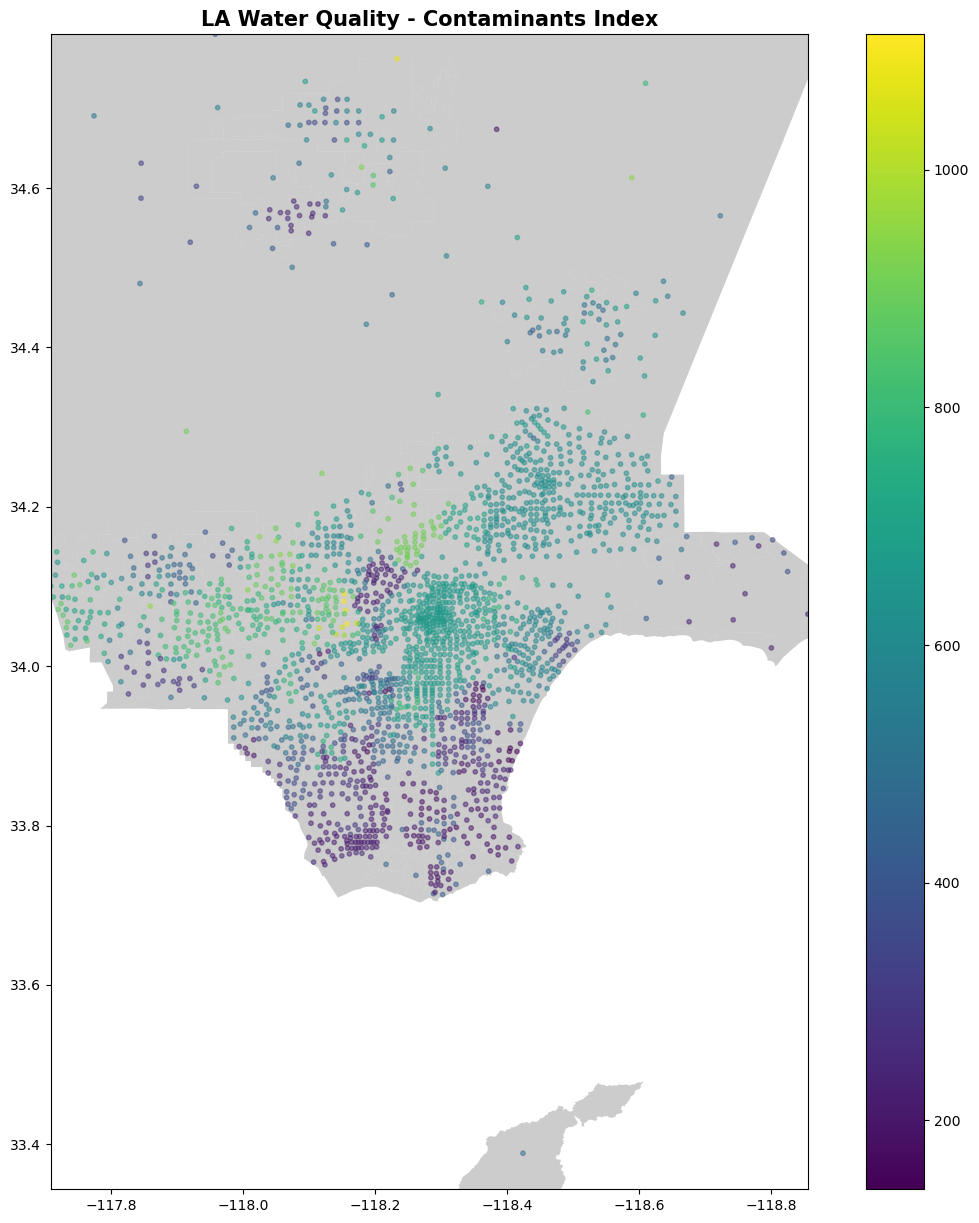

In [16]:
fig, ax = plt.subplots(figsize = (15,15))

map.plot(ax=ax, alpha = 0.4, color = 'grey')


geo_df.plot(column = 'Count', ax=ax, alpha = 0.5, legend= True, markersize = 10)

plt.title('LA Water Quality - Contaminants Index', fontsize=15, fontweight = 'bold')

plt.xlim(-117.708132, -118.8552812)
plt.ylim(33.343563, 34.7929935)

plt.show()